In [1]:
cd ~/project_dipole/dumps

/home/common/studtscm03/project_dipole/dumps


In [2]:
ls

dump.dipole103  dump.dipole172  dump.dipole27  dump.dipole67
dump.dipole124  dump.dipole18   dump.dipole38  dump.dipole84
dump.dipole147  dump.dipole200  dump.dipole52


In [3]:
from funcs_file import input_dump, plot, make_txt
import matplotlib.pyplot as plt
import numpy as np
import plotly
import nglview
from multiprocessing import Pool

# Визуализация диполей (обычный matplotlib)

In [63]:
curr_dict = input_dump("/home/common/studtscm03/project_dipole/dumps/dump.dipole200")
curr_dict["coords"].shape

(800, 200, 3)

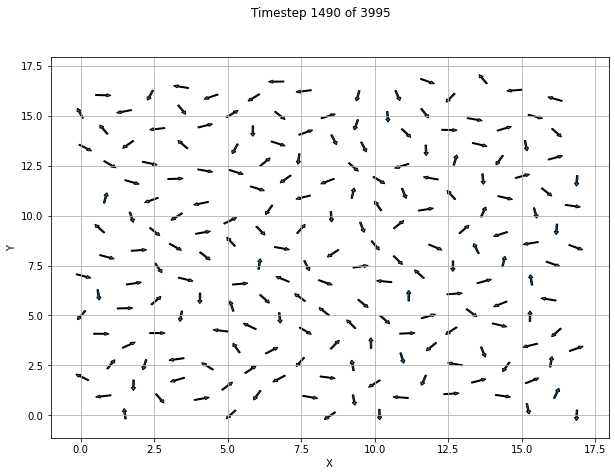

In [64]:
plot(curr_dict,1490)

# Визуализация с использованием plotly

# Применение multiprocessing

In [44]:
curr_dict = input_dump("/home/common/studtscm03/project_dipole/dumps/dump.dipole200")
curr_dict["coords"].shape

(300, 200, 3)

In [45]:
%%timeit
count_energy(curr_dict, timestep = 0, use_mult=False)

601 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
count_energy(curr_dict, timestep = 0, use_mult=True)

495 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Визуализация с использованием ase

In [47]:
from ase import Atoms
from ase.visualize import view

In [55]:
def make_coordinates(filename,timestep=0):
    arrow_size = 0.5
    data = input_dump(filename)
    ind = 0
    while(data["timesteps"][ind]<timestep and ind<len(data["timesteps"])):
        ind+=1
    moments = data["momentums"][ind]
    coords = data["coords"][ind]
    d1s = []
    d2s = []
    min_max = np.zeros((3,2))
    min_max[2][0] = -0.5
    min_max[2][1] = 0.5
    for i in range(len(coords)):
        center = np.array(coords[i])
        min_max[0][0] = min(min_max[0][0],center[0])
        min_max[1][0] = min(min_max[1][0],center[1])
        min_max[0][1] = max(min_max[0][1],center[0])
        min_max[1][1] = max(min_max[1][1],center[1])
            
        delta = np.array([moments[i][0]*arrow_size*0.5,moments[i][1]*arrow_size*0.5,0])
        d1s.append(center-delta)
        d2s.append(center+delta)
    full_coords = d1s + d2s
    cell = []
    for i in range(len(min_max)):
        cell.append(min_max[i][1]-min_max[i][0])
    full_coords = d1s + d2s
    h_positions = Atoms('O{:d}N{:d}'.format(len(d1s),len(d2s)), 
                    positions=full_coords,cell=cell)
    return h_positions


def make_time_c(filename):
    data = []
    timesteps = input_dump(filename)["timesteps"]
    for time in timesteps:
        data.append(make_coordinates(filename,timestep=time))
    return data

## Единичное построение

In [56]:
filename = "/home/common/studtscm03/project_dipole/dumps/dump.dipole200"
h_positions = make_coordinates(filename,timestep=50)

view(h_positions, viewer='ngl')

## Построение с динамикой

In [58]:
filename = "/home/common/studtscm03/project_dipole/dumps/dump.dipole200"

data = make_time_c(filename)
print("Data complited")
view(data, viewer='ngl')

Data complited


In [62]:
import ovito

ModuleNotFoundError: No module named 'ovito'